<a href="https://colab.research.google.com/github/Mansisarda1999/Text-Detection-recognition-and-translation/blob/deployement/Text_Detection%2C_Recognition_and_Translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Packages

In [ ]:
!pip install tensorflow==2.2.0

In [ ]:
!pip install keras==2.3.1

In [ ]:
!pip install -U segmentation-models

In [ ]:
!pip install pytesseract
!sudo apt install tesseract-ocr


In [ ]:
!pip install easyocr
!pip uninstall torchvision
!pip install torchvision==0.4.0 -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
!pip install pillow==6.1

In [ ]:
!pip install autocorrect

## To download 229 images that comprise the training dataset of ICDAR 2013-2015 Focused Scene Text Competition and ICDAR 2015 Incidental Scene Text. 
This data will be used for testing and validation of the model

In [ ]:
!wget --header="Host: rrc.cvc.uab.es" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.190 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en-IN;q=0.9,en;q=0.8" --header="Referer: https://rrc.cvc.uab.es/?ch=2&com=downloads" --header="Cookie: PHPSESSID=on1675unjsloqei21p3d7p40sr; _ga=GA1.2.258207289.1612335877; _gid=GA1.2.420492267.1615211657; _gat=1" --header="Connection: keep-alive" "https://rrc.cvc.uab.es/downloads/ch2_training_images.zip" -c -O 'ch2_training_images.zip'

In [ ]:
!wget --header="Host: rrc.cvc.uab.es" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.190 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en-IN;q=0.9,en;q=0.8" --header="Referer: https://rrc.cvc.uab.es/?ch=2&com=downloads" --header="Cookie: PHPSESSID=on1675unjsloqei21p3d7p40sr; _ga=GA1.2.258207289.1612335877; _gid=GA1.2.420492267.1615211657" --header="Connection: keep-alive" "https://rrc.cvc.uab.es/downloads/ch2_training_localization_transcription_gt.zip" -c -O 'ch2_training_localization_transcription_gt.zip'

In [ ]:
!wget --header="Host: rrc.cvc.uab.es" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.190 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en-IN;q=0.9,en;q=0.8" --header="Referer: https://rrc.cvc.uab.es/?ch=4&com=downloads" --header="Cookie: PHPSESSID=on1675unjsloqei21p3d7p40sr; _ga=GA1.2.258207289.1612335877; _gid=GA1.2.420492267.1615211657; _gat=1" --header="Connection: keep-alive" "https://rrc.cvc.uab.es/downloads/ch4_training_images.zip" -c -O 'ch4_training_images.zip'

In [ ]:
!wget --header="Host: rrc.cvc.uab.es" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.190 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en-IN;q=0.9,en;q=0.8" --header="Referer: https://rrc.cvc.uab.es/?ch=4&com=downloads" --header="Cookie: PHPSESSID=on1675unjsloqei21p3d7p40sr; _ga=GA1.2.258207289.1612335877; _gid=GA1.2.420492267.1615211657; _gat=1" --header="Connection: keep-alive" "https://rrc.cvc.uab.es/downloads/ch4_training_vocabularies_per_image.zip" -c -O 'ch4_training_vocabularies_per_image.zip'

In [ ]:
!wget --header="Host: rrc.cvc.uab.es" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.190 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en-IN;q=0.9,en;q=0.8" --header="Referer: https://rrc.cvc.uab.es/?ch=4&com=downloads" --header="Cookie: PHPSESSID=on1675unjsloqei21p3d7p40sr; _ga=GA1.2.258207289.1612335877; _gid=GA1.2.420492267.1615211657; _gat=1" --header="Connection: keep-alive" "https://rrc.cvc.uab.es/downloads/ch4_training_localization_transcription_gt.zip" -c -O 'ch4_training_localization_transcription_gt.zip'

## ICDAR_2013-15

In [ ]:
!rm -rf "ICDAR_2013"
!mkdir "ICDAR_2013"  

In [ ]:
import shutil ## ICDAR_2013 for validation and testing
## it consists of 229 images. The text in this data is horizontally oriented.
shutil.unpack_archive("/content/ch2_training_images.zip", "/content/ICDAR_2013/images")

In [ ]:
!mkdir "/content/ICDAR_2013/g_t_loc_tran" 

In [ ]:
#-Ground truth for 229 Text files i.e ICDAR 2013 data(one per image). 
## Each line corresponds to one word and comprises the coordinates of the four corners 
## of the bounding box given in a clockwise order in a comma separated list, and the transcription following the eighth comma.
shutil.unpack_archive("/content/ch2_training_localization_transcription_gt.zip", "/content/ICDAR_2013/g_t_loc_tran")

In [ ]:
!mkdir "/content/ICDAR_2013/vocab_img_distractors" 

In [ ]:
#Vocabularies of 100 words per image, comprising the words appearing in the image plus distractors.
#for ICDAR 2013 data
shutil.unpack_archive("/content/ch2_training_vocabularies_per_image.zip", "/content/ICDAR_2013/vocab_img_distractors")

In [ ]:
!mkdir "/content/ICDAR_2013/vocab" 
##This folder contains .txt file of vocabulary of all words (words of 3 characters or longer comprising only letters) appearing in the training set of ICDAR 2013.

Some Images and ground truth from the above data
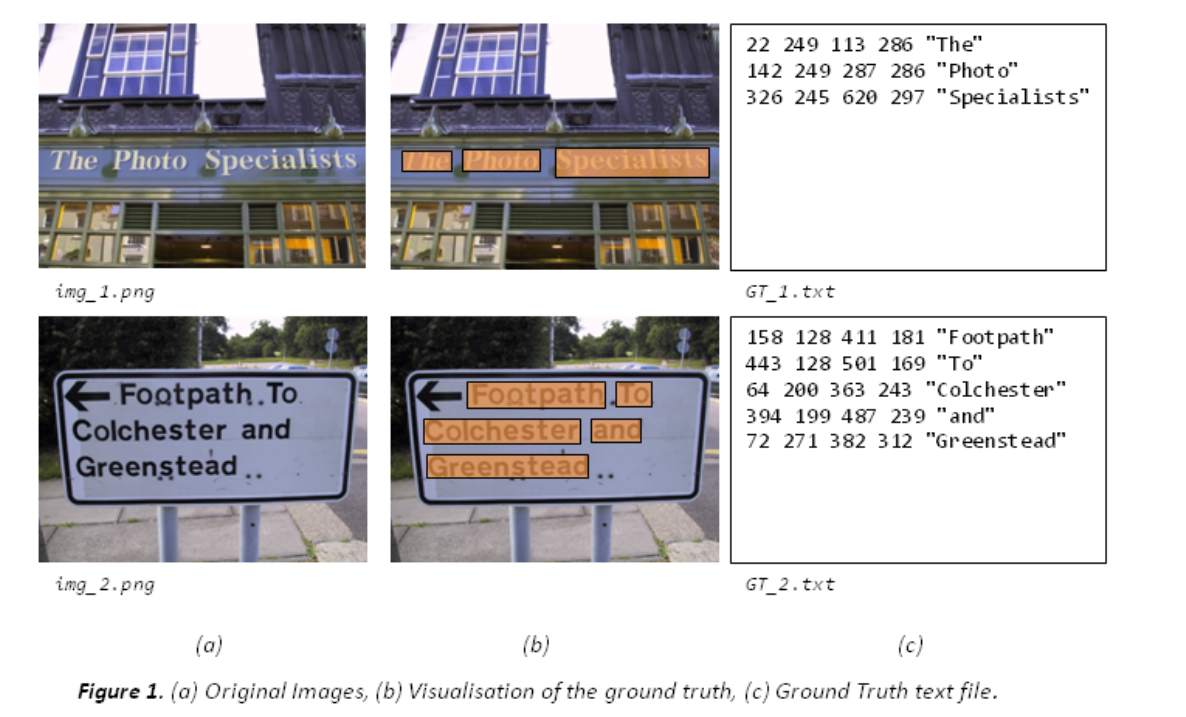

## ICDAR 2015

In [ ]:
!rm -rf "ICDAR_2015"
!mkdir "ICDAR_2015"  

In [ ]:
import shutil ## ICDAR_2015 for validation and testing
## 1000 images obtained with wearable cameras.
shutil.unpack_archive("/content/ch4_training_images.zip", "/content/ICDAR_2015/images")

In [ ]:
!mkdir "/content/ICDAR_2015/g_t_loc_tran" 

In [ ]:
#-Ground truth for 1000 text files with word level localisation and transcription ground truth.
shutil.unpack_archive("/content/ch4_training_localization_transcription_gt.zip", "/content/ICDAR_2015/g_t_loc_tran")

In [ ]:
!mkdir "/content/ICDAR_2015/vocab_img_distractors" 

In [ ]:
#Vocabularies of 100 words per image, comprising the words appearing in the image plus distractors.
#for ICDAR 2015 data
shutil.unpack_archive("/content/ch4_training_vocabularies_per_image.zip", "/content/ICDAR_2015/vocab_img_distractors")

In [ ]:
!mkdir "/content/ICDAR_2015/vocab" 
##Vocabulary of all words (words of 3 characters or longer comprising only letters) appearing in the training set of ICDAR 2015.

Some Images and ground truth from the above data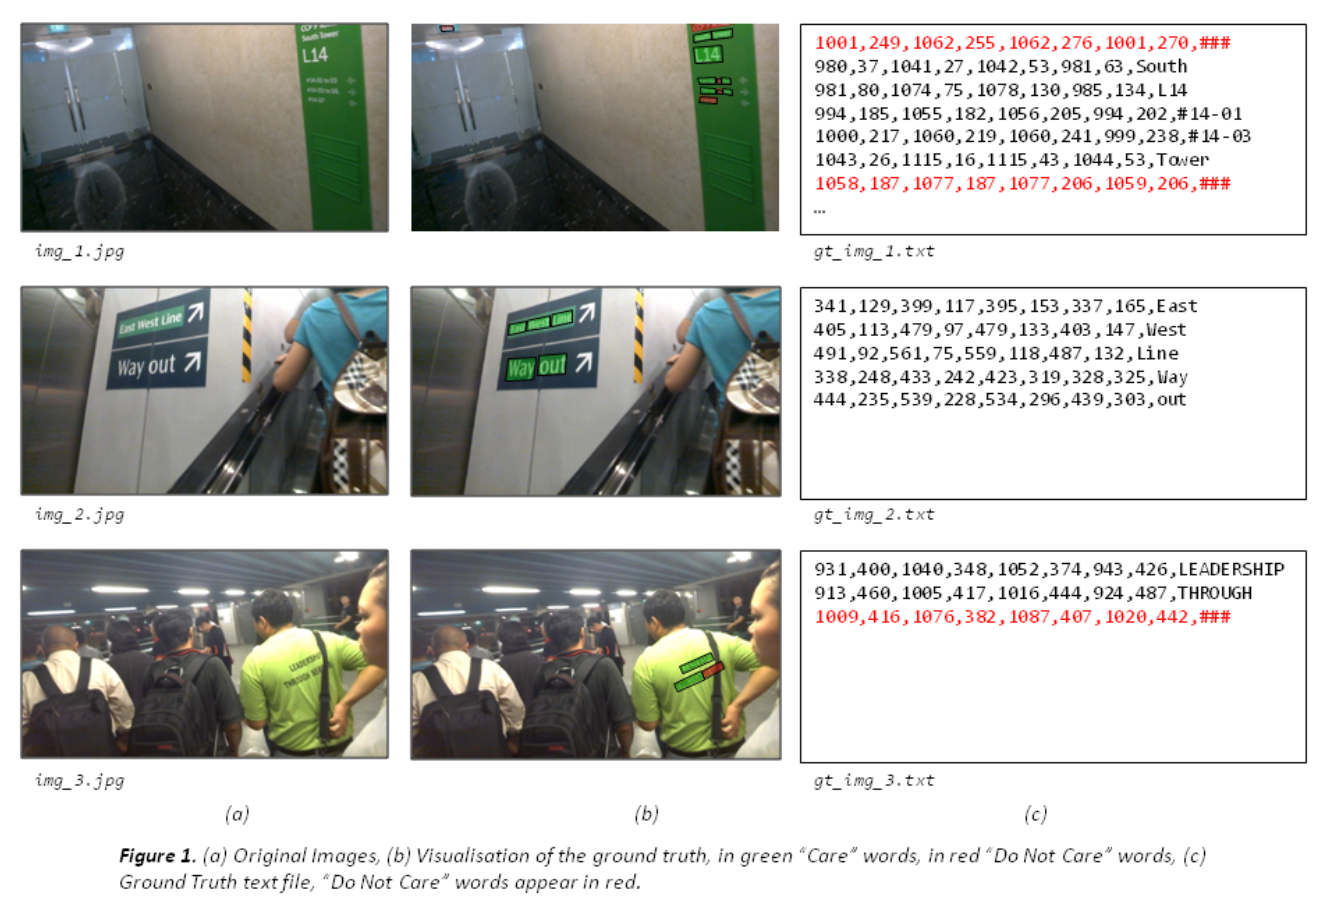

## All the above data consists of english language text only. Most of them are horizontal oriented while some have multi oriented textual regions.

## Importing Packages

In [ ]:
import tensorflow as tf
from autocorrect import Speller
import os
from sklearn.model_selection import train_test_split
from matplotlib import gridspec
# tf.compat.v1.enable_eager_execution()
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Multiply
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.initializers import glorot_uniform
K.set_image_data_format('channels_last')
K.set_learning_phase(1)
from keras.utils import to_categorical
import math
import PIL
from PIL import Image, ImageDraw
from PIL import ImagePath
import pandas as pd
import os
from os import path
from tqdm import tqdm
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib
from numpy import zeros
import re

import glob
import csv
import cv2
import time
import os
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import matplotlib.patches as Patches
from shapely.geometry import Polygon
import random
import tensorflow.compat.v1 as tf
from google.colab.patches import cv2_imshow

import numpy as np
import pandas as pd
import os
import random
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import pytesseract
import shutil
import string
import argparse
import torch
import torch.backends.cudnn as cudnn
import torch.utils.data
import torch.nn.functional as F
from imutils.object_detection import non_max_suppression
import time
from tqdm import tqdm
import re
from PIL import Image, ImageFont, ImageDraw
from collections import Counter
import joblib

In [ ]:
!wget --header="Host: raw.githubusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.190 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en-IN;q=0.9,en;q=0.8" --header="Referer: https://github.com/oyyd/frozen_east_text_detection.pb/blob/master/frozen_east_text_detection.pb" "https://raw.githubusercontent.com/oyyd/frozen_east_text_detection.pb/master/frozen_east_text_detection.pb" -c -O 'frozen_east_text_detection.pb'

# EDA

## Load the bounding boxes and plotting it around text regions on the image of ICDAR_2013-15 

In [ ]:
def get_all_coordinates_truth_2013_15(source,img_num):
  li = []
  f = open(source+img_num+".txt", "r",encoding='utf-8-sig')
  for x in f:
    li.append(x.split(','))
  return li

In [ ]:
source = "/content/ICDAR_2013/g_t_loc_tran/gt_img_"
def bounding_box(img_array,i,ax,fig):
  boxes = []
  g_t = []
  ## Let us look take one image and append all the coordinates and actual text of each textual region in that iamge in a list 
  li = get_all_coordinates_truth_2013_15(source,"".join(re.findall("[0-9]",i)))
  for i in li: ## Taking all the coordinates of text region in that image and appending that in a list boxes
    x1 = int(i[0])
    y1 = int(i[1])
    x2 = int(i[2])
    y2 = int(i[3])
    x3 = int(i[4])
    y3 = int(i[5])
    x4 = int(i[6])
    y4 = int(i[7])
    g_t.append(i[8].replace("\n",""))
    vertexlist = [x1,y1,x2,y2,x3,y3,x4,y4]
    boxes.append(vertexlist)
  b = np.array(boxes)
  g_t = np.array(g_t)
  (numRows, numCols) = b.shape ## num_row : the number of textual regions, number col : 8 i.e 4 (x,y)coordinates  
  for y in range(0, numRows):
    for x in range(0, numCols):
      pts = np.array([[b[y,0],b[y,1]],[b[y,2],b[y,3]],[b[y,4],b[y,5]],[b[y,6],b[y,7]]], np.int32) ## taking the co ordinates of rectangle
      pts = pts.reshape((-1,1,2))
      img = cv2.polylines(img_array,[pts],True,(0,255,255),thickness =3) ## used to draw bounding box on the image
      
      (text_width, text_height) = cv2.getTextSize(g_t[y], cv2.FONT_HERSHEY_PLAIN, 1.5, 1)[0] ## taking width and height of the image
      # set the text start position
      text_offset_x = b[y,0] 
      text_offset_y = b[y,1] + 2
      # make the coords of the box with a small padding of two pixels
      box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
      cv2.rectangle(img, box_coords[0], box_coords[1], (255, 255, 255), cv2.FILLED)
      cv2.putText(img, g_t[y], (text_offset_x, text_offset_y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 0, 0), 1) ## put the text on the image
  plt.imshow(img)

def load_image(path):
  for ind,i in enumerate(path):
    
    filepath = "/content/ICDAR_2013/images/"+i
    img_array = cv2.imread(filepath)
    
    gs = gridspec.GridSpec(ind+1, 2) 
    fig = plt.figure(figsize=(25,25))
    
    # 1st, ploting original image
    ax = plt.subplot(gs[0])
    ax.grid(False)
    ax.imshow(img_array)
    
    ax = plt.subplot(gs[1])
    ax.grid(False)
    bounding_box(img_array,i,ax,fig)
    
# First image of the training data 
load_image(os.listdir("/content/ICDAR_2013/images")[10:15])

1. The above images is from ICDAR 2013 which consists of 229 training image. 
2. Different to other two datasets it consists horizontal text.
3. It contains English text only.

## Load the bounding boxes and plotting it around text regions on the image of ICDAR_2015 

In [ ]:
source2 = "/content/ICDAR_2015/g_t_loc_tran/gt_img_"
def bounding_box(img_array,i,ax,fig):
  boxes = []
  g_t = []
  ## Let us look take one image and append all the coordinates and actual text of each textual region in that iamge in a list 
  li = get_all_coordinates_truth_2013_15(source2,"".join(re.findall("[0-9]",i)))
  for i in li: ## Taking all the coordinates of text region in that image and appending that in a list boxes
    x1 = int(i[0])
    y1 = int(i[1])
    x2 = int(i[2])
    y2 = int(i[3])
    x3 = int(i[4])
    y3 = int(i[5])
    x4 = int(i[6])
    y4 = int(i[7])
    g_t.append(i[8].replace("\n",""))
    vertexlist = [x1,y1,x2,y2,x3,y3,x4,y4]
    boxes.append(vertexlist)
  b = np.array(boxes)
  g_t = np.array(g_t)
  (numRows, numCols) = b.shape ## num_row : the number of textual regions, number col : 8 i.e 4 (x,y)coordinates  
  for y in range(0, numRows):
    for x in range(0, numCols):
      pts = np.array([[b[y,0],b[y,1]],[b[y,2],b[y,3]],[b[y,4],b[y,5]],[b[y,6],b[y,7]]], np.int32) ## taking the co ordinates of rectangle
      pts = pts.reshape((-1,1,2))
      img = cv2.polylines(img_array,[pts],True,(0,255,255),thickness =3) ## used to draw bounding box on the image
      
      (text_width, text_height) = cv2.getTextSize(g_t[y], cv2.FONT_HERSHEY_PLAIN, 1.5, 1)[0] ## taking width and height of the image
      # set the text start position
      text_offset_x = b[y,0] 
      text_offset_y = b[y,1] + 2
      # make the coords of the box with a small padding of two pixels
      box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
      cv2.rectangle(img, box_coords[0], box_coords[1], (255, 255, 255), cv2.FILLED)
      cv2.putText(img, g_t[y], (text_offset_x, text_offset_y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 0, 0), 1) ## put the text on the image
  plt.imshow(img)

def load_image(path):
  for ind,i in enumerate(path):
    
    filepath = "/content/ICDAR_2015/images/"+i
    img_array = cv2.imread(filepath)
    
    gs = gridspec.GridSpec(ind+1, 2) 
    fig = plt.figure(figsize=(25,25))
    
    # 1st, ploting original image
    ax = plt.subplot(gs[0])
    ax.grid(False)
    ax.imshow(img_array)
    
    ax = plt.subplot(gs[1])
    ax.grid(False)
    bounding_box(img_array,i,ax,fig)
    
# First image of the training data 
load_image(os.listdir("/content/ICDAR_2015/images")[:5])

1. The above images is from ICDAR 2015 data of Incidental Scene Text. 
2. The text here is of only one language i.e english but is at different orientations.

## Size of the images

In [ ]:
for i in os.listdir("/content/ICDAR_2015/images")[:10]:
  image = PIL.Image.open("/content/ICDAR_2015/images/"+i)
  width, height = image.size
  print(width, height)

1. images are of same sizes i.e 1280,720 for ICDAR_2015_Incidental_Scene_Text Data. 
2. Height and width are printed for first 10 images 


In [ ]:
for i in os.listdir("/content/ICDAR_2013/images")[:10]:
  image = PIL.Image.open("/content/ICDAR_2013/images/"+i)
  width, height = image.size
  print(width, height)

1. images are of different sizes for ICDAR_2013-15_Focussed_Scene_Text Data. 
2. Height and width are printed for first 10 images 


## Merging the data to create a dataframe with 3 cols. 
1) . Image path.
2). Co-ordinates of bounding text.
3). Actual text in those boxes.
4). theta values
5). Also giving labels so that while splitting, the train test and validation can get images from all 3 data evenly. 

In [ ]:
def g_t2(i,source):
  boxes = []
  g_t = []
  ## Let us look take one image and append all the coordinates and actual text of each textual region in that iamge in a list 
  li = get_all_coordinates_truth_2013_15(source,"".join(re.findall("[0-9]",i)))
  for i in li: ## Taking all the coordinates of text region in that image and appending that in a list boxes
    x1 = int(i[0])
    y1 = int(i[1])
    x2 = int(i[2])
    y2 = int(i[3])
    x3 = int(i[4])
    y3 = int(i[5])
    x4 = int(i[6])
    y4 = int(i[7])
    g_t.append(i[8].replace("\n",""))
    vertexlist = [x1,y1,x2,y2,x3,y3,x4,y4]
    boxes.append(vertexlist)
  b = np.array(boxes)
  g_t = np.array(g_t)
  return b,g_t


In [ ]:
'''
https://stackoverflow.com/questions/13002979/how-to-calculate-rotation-angle-from-rectangle-points
  General case solution for a rectangle
 *
 *  Given coordinages of [x1, y1, x2, y2, x3, y3, x4, y4]
 *  where the corners are:
 *            top left    : x1, y1
 *            top right   : x2, y2
 *            bottom right: x3, y3
 *            bottom left : x4, y4
 *
 *  The centre is the average top left and bottom right coords:
 *  center: (x1 + x3) / 2 and (y1 + y3) / 2
 *
 *  Clockwise rotation: Math.atan((x1 - x4)/(y1 - y4)) with
 *  adjustment for the quadrant the angle is in.
 *
 *  Note that if using page coordinates, y is +ve down the page which
 *  is the reverse of the mathematic sense so y page coordinages
 *  should be multiplied by -1 before being given to the function.
 *  (e.g. a page y of 400 should be -400).
'''
def getRotation(coords):
    # Get center as average of top left and bottom right
    center = [(coords[0] + coords[4]) / 2,
                  (coords[1] + coords[5]) / 2]

    # Get differences top left minus bottom left
    diffs = [coords[0] - coords[6], coords[1] - coords[7]]

    # Get rotation in degrees
    rotation = math.atan(diffs[0]/diffs[1]) * 180 / math.pi

    # Adjust for 2nd & 3rd quadrants, i.e. diff y is -ve.
    if (diffs[1] < 0):
        rotation += 180

    # Adjust for 4th quadrant
    # i.e. diff x is -ve, diff y is +ve
    elif (diffs[0] < 0):
        rotation += 360
    # return array of [[centerX, centerY], rotation];
    return [center, rotation]
  

In [ ]:
data_2015=[]
for path in os.listdir("/content/ICDAR_2015/images"):
    b,g_t = g_t2(path,source2)
    center_orientation=[]
    for coords in b:
      center_orientation.append(getRotation(coords))
    data_2015.append(("/content/ICDAR_2015/images/"+path,b,g_t,center_orientation,2))

data_2013=[]
for path in os.listdir("/content/ICDAR_2013/images"):
    b,g_t = g_t2(path,source)
    center_orientation=[]
    for coords in b:
      center_orientation.append(getRotation(coords))
    data_2013.append(("/content/ICDAR_2013/images/"+path,b,g_t,center_orientation,1))


In [ ]:
df_2013 = pd.DataFrame(data = data_2013,columns=['path','co_ordinates','g_t','canter_orientation','label'])
df_2015 = pd.DataFrame(data = data_2015,columns=['path','co_ordinates','g_t','canter_orientation','label'])

In [ ]:
ind=[]
for i in range(df_2013.shape[0]):
  if df_2013.path[i].split('.')[1] == "gif":
    ind.append(i)
df_2013 = df_2013.drop(ind)

ind=[]
for i in range(df_2015.shape[0]):
  if df_2015.path[i].split('.')[1] == "gif":
    ind.append(i)
df_2015 = df_2015.drop(ind)

To remove gif extensions

In [ ]:
df_2013 = df_2013.reset_index(drop=True)

df_2015 = df_2015.reset_index(drop=True)

df_2013.head()

In [ ]:
df_2015.head()

 To separate dataframes are created.
1. 2013 data set have text in english language and horizontally oriented. 
2. 2015 dataset has text in english language but the textual regions are multi oriented.

Hence, two datasets are created. 

## Summary:

1. All the images are downloaded from the trainig set provided by these competitions:
    
    
* ICDAR-2015 Incidental Scene Text Competition.It contains 1000 images obtained with wearable cameras. The textual regions here have different orientations. 

*  ICDAR 2013-15 "Focused Scene Text". It provides 229 images. The text here is horizontally oriented.

All the above data have english text except the first one which has multiple languages including english.


2. Functions are made to map the bounding box on the text regions in the images and write the ground truth.

3. Function is defined to calculate the orientation angle in degrees and the center of the rectangle using the coordinates of the bounding box.

4. Images from the 2 datasets are teken and separate dataframes are created.

4. each dataframe contains:
  1. path of the image
  2. ground truth
  3. Coordinates of the bounding boxes.
  4. orientation of the rectangle and the center of the rectangle.
  5. label is used to denote which image belongs to which dataset. So has to split the data evenly in train test split.
 df_2013 has label 1
 and df_2015 has label 2


# Models used

## MSER

In [ ]:
mser = cv2.MSER_create()
img = cv2.imread(df_2013['path'].values[1])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
regions, _ = mser.detectRegions(gray)
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
cv2.polylines(img, hulls, 1, (0, 255, 0))
cv2_imshow(cv2.resize(img,(640,360)))


In [ ]:
mser = cv2.MSER_create()
img = cv2.imread(df_2015['path'].values[1])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
regions, _ = mser.detectRegions(gray)
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
cv2.polylines(img, hulls, 1, (0, 255, 0))
cv2_imshow(cv2.resize(img,(640,360)))

The above is not doing that good job in text detection. Although its working quite well for horizontal text data.

## Pytesseract and East

In [ ]:
## https://www.geeksforgeeks.org/text-detection-and-extraction-using-opencv-and-ocr/
def pytesseract_text_recognizer(image,coords):
  
  pred = []
  #Configuration setting to convert image to string.  
  configuration = ("-l eng --oem 3 --psm 12")
  temp = ""
  for i in range(len(coords)):
    startY, endY, startX, endX = coords[i]
    temp = pytesseract.image_to_string(image[startY : endY, startX : endX], config=configuration).strip()
    pred.append(temp)
  pred_ = pred.copy()

  #Clean predictions
  pred = re.sub(r"\n", " ", " ".join(pred))
  pred = re.sub(r"\t", " ", pred)
 
  return pred,pred_

In [ ]:
## https://github.com/oyyd/frozen_east_text_detection.pb/blob/master/frozen_east_text_detection.pb
def EAST_text_detector(path):
	pred,coords = [],[]
	image = cv2.imread(path)
	
	original_image_copy = image.copy()
	temp = image.copy()
	#Converting the image to gray scale
	temp = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)

	(H, W) = image.shape[:2]
	#Setting the new width and height and then determine the ratio in change for both the width and height
	(newW, newH) = (512, 288)
	rW = W / float(newW)
	rH = H / float(newH)
	#Resizing the image and taking the new image dimensions
	image = cv2.resize(image, (newW, newH))
	(H, W) = image.shape[:2]

	#Setting the output layer set
	layers = ["feature_fusion/Conv_7/Sigmoid", "feature_fusion/concat_3"]
	
	#print("Loading EAST text detector...")
	east_net = cv2.dnn.readNet('/content/frozen_east_text_detection.pb')
	#Constructing a blob from the image and then performing a forward pass of the model to obtain the two output layer sets
	mean_color = np.average(image, axis=1)
	mean_bgr = np.average(mean_color, axis=0)
	mean_rgb = tuple([mean_bgr[2],mean_bgr[1],mean_bgr[0]])
	blob = cv2.dnn.blobFromImage(image, 1.0, (W, H), mean_rgb, swapRB=True, crop=False)

	start = time.time()
	east_net.setInput(blob)

	(scores, geometry) = east_net.forward(layers)
	end = time.time()
	
	#Taking the number of rows and columns from the scores volume, then initializing our set of bounding box rectangles
	#and corresponding confidence scores
	(numRows, numCols) = scores.shape[2:4]
	rects, confidences = [], []
	for y in range(0, numRows):
		#Extracting the scores (probabilities), followed by the geometrical data used to derive potential bounding box
  	#coordinates that surround text
		scoresData = scores[0, 0, y]
		xData0 = geometry[0, 0, y]
		xData1 = geometry[0, 1, y]
		xData2 = geometry[0, 2, y]
		xData3 = geometry[0, 3, y]
		anglesData = geometry[0, 4, y]

		for x in range(0, numCols):
			#If our score does not have sufficient probability, ignore it
			if scoresData[x] < 0.5:
				continue
			#Computing the offset factor as our resulting feature maps will be 4 times smaller than the input image
			(offsetX, offsetY) = (x * 4.0, y * 4.0)
			#Extracting the rotation angle for the prediction and then computing the sin and cosine
			angle = anglesData[x]
			cos = np.cos(angle)
			sin = np.sin(angle)
			#Using the geometry volume to derive the width and height of the bounding box
			h = xData0[x] + xData2[x]
			w = xData1[x] + xData3[x]
			#Computing both the starting and ending (x, y)-coordinates for the text prediction bounding box
			endX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
			endY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))
			startX = int(endX - w)
			startY = int(endY - h)
			#Adding the bounding box coordinates and probability score to our respective lists
			rects.append((startX, startY, endX, endY))
			confidences.append(scoresData[x])

	#Applying non-maxima suppression to suppress weak, overlapping bounding boxes
	boxes = non_max_suppression(np.array(rects), probs=confidences)

	for (startX, startY, endX, endY) in boxes:
		#Scaling the bounding box coordinates based on the respective ratios
		startX = int(startX * rW) - 2
		startY = int(startY * rH) - 1
		endX = int(endX * rW) + 2
		endY = int(endY * rH) + 2

		#If coords are out of the image dimension resizing it
		if startX < 0:
			startX = 0
		if endX > original_image_copy.shape[1]:
			endX = original_image_copy.shape[1]
		if startY < 0:
			startY = 0
		if endY > original_image_copy.shape[0]:
			endY = original_image_copy.shape[0]

		#Drawing the bounding box on the image
		cv2.rectangle(original_image_copy, (startX, startY), (endX, endY), (0, 255, 0), 2)
		if endX > original_image_copy.shape[1] or endY > original_image_copy.shape[0]:
			endX = original_image_copy.shape[1]
			endY = original_image_copy.shape[0]
		coords.append((startY, endY, startX, endX))
  
	return cv2.cvtColor(original_image_copy, cv2.COLOR_BGR2GRAY), coords

In [ ]:
## https://stackoverflow.com/questions/13928155/spell-checker-for-python/48280566#:~:text=The%20best%20way%20for%20spell,The%20fastest%20one%20is%20SymSpell.
def EAST_with_Pyserract(path,gt):
  image, coords = EAST_text_detector(path)
  recognized_op,pred_ = pytesseract_text_recognizer(image, coords)
  
  pred = recognized_op.lower().split()
  spell = Speller(lang='en')
  for i in range(len(pred)):
      pred[i] = spell(pred[i])

  actual = "|".join(list(gt)).lower().split('|')
  y_true = 0
  for i in pred:
    for j in actual:
      if i == j:
        y_true +=1
  print('Actual text instances:',actual)
  print('Predicted text instances:',pred)
  print('\nNumber of correctly recognized word:',y_true)
  print('Number of incorrectly or not recognized word:',len(actual)-y_true)
  print('\nAccuracy:',(y_true*100)/(len(actual)),'%\n')
  print('-'*75,'\n')

  color_image = cv2.imread(path)
  for i in range(len(coords)):
    startY, endY, startX, endX = coords[i]
    cv2.rectangle(color_image, (startX, startY), (endX, endY), (0, 255, 0), 2)
    cv2.putText(color_image, pred_[i], (startX, startY-7), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255,255,255), 2)
  cv2_imshow(cv2.resize(color_image,(512,384)))

  return y_true,len(actual)-y_true,(y_true*100)/(len(actual))

In [ ]:
for i in range(10,25):
  y_true,y_false,acc = EAST_with_Pyserract(df_2013['path'].values[i],df_2013['g_t'].values[i])

In [ ]:
for i in range(35):
  y_true,y_false,acc = EAST_with_Pyserract(df_2015['path'].values[i],df_2015['g_t'].values[i])

The above model is only good at detecting horizontal text which is not blurry. It is not doing that good of a job in text recognition for blurry images.

The text detection is good for blurry images that it is recognizing the blurry textual region but is not able to understand the text.

## Easyocr

In [ ]:
import easyocr
reader = easyocr.Reader(['en'])

In [ ]:
def easyocr_engine(path,gt):
  coords = []
  image = cv2.imread(path)
  image_copy = image.copy()
  image_copy1 = image.copy()
  op = reader.readtext(image)
  pred_words=[]
  for i in range(len(op)):
    pts = np.array(op[i][0])
    coords.append(np.int32(pts))
    cv2.polylines(image, np.int32([pts]),True,(0,255,0),2)
    cv2.polylines(image_copy1, np.int32([pts]),True,(0,255,0),2)
    
    ## https://www.geeksforgeeks.org/python-opencv-cv2-puttext-method/
    cv2.putText(image, op[i][1], (int(op[i][0][0][0]), int(op[i][0][0][1]-7)), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,0), 2)
    pred_words.append(op[i][1])
  cv2_imshow(cv2.resize(image,(512,384)))
  
  pred_words = " ".join(pred_words).lower().split()
  spell = Speller(lang='en')
  for i in range(len(pred_words)):
      pred_words[i] = spell(pred_words[i])

  actual = "|".join(list(gt)).lower().split('|')
  y_true = 0
  for i in pred_words:
    for j in actual:
      if i == j:
        y_true +=1
  print('Actual text instances:',actual)
  print('Predicted text instances:',pred_words)
  print('\nNumber of correctly recognized word:',y_true)
  print('Number of incorrectly or not recognized word:',len(actual)-y_true)
  print('\nAccuracy:',(y_true*100)/(len(actual)),'%\n')
  print('-'*75,'\n')


  return image_copy,image_copy1, coords,pred_words

for i in range(10,25):  
  _,_ ,_,_= easyocr_engine(df_2013['path'].values[i],df_2013['g_t'].values[i])

In [ ]:
for i in range(0,10):  
  _,_ ,_,_= easyocr_engine(df_2015['path'].values[i],df_2015['g_t'].values[i])

1. The above algorithm is fairly good at text detection not just for horizontal text but for different orientations of textual regions.
2. Text recognition is very good for clear horizontal text. The accuracy drops in case of blurred and multi oriented textual regions.

## Translation

In [ ]:
## https://www.geeksforgeeks.org/build-an-application-to-translate-english-to-hindi-in-python/
!pip install englisttohindi
!sudo apt-get install fonts-gargi

In [ ]:
# importing the module 
## https://www.geeksforgeeks.org/build-an-application-to-translate-english-to-hindi-in-python/
from englisttohindi.englisttohindi import EngtoHindi 
  
# message to be translated 
message = "Yes, I am geeks"
  
# creating a EngtoHindi() object 
res = EngtoHindi(message) 

# displaying the translation 
print(res.convert)

In [ ]:
def easyocr_engine(path,gt):
  coords = []
  image = cv2.imread(path)
  image_copy = image.copy()
  image_copy1 = image.copy()
  op = reader.readtext(image)
  pred_words=[]
  for i in range(len(op)):
    pts = np.array(op[i][0])
    coords.append(np.int32(pts))
    cv2.polylines(image, np.int32([pts]),True,(0,255,0),2)
    cv2.polylines(image_copy1, np.int32([pts]),True,(0,255,0),2)
    
    ## https://www.geeksforgeeks.org/python-opencv-cv2-puttext-method/
    cv2.putText(image, op[i][1], (int(op[i][0][0][0]), int(op[i][0][0][1]-7)), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,0), 2)
    pred_words.append(op[i][1])
  
  

  return image_copy,image_copy1, coords,pred_words

In [ ]:
!apt install fonts-gargi

In [ ]:
font_hindi = ImageFont.truetype("/usr/share/fonts/truetype/Gargi/Gargi.ttf",25)

# Final Pipeline

In [ ]:

!pip install englisttohindi
  
def english_to_hindi(text):
  '''
  This function accepts the english sentence or word,
  and converts it to hindi language
  '''
  from englisttohindi.englisttohindi import EngtoHindi 
  
  #creating a EngtoHindi() object 
  res = EngtoHindi(text) 
  
  #converting english text to hindi text
  converted_text = res.convert

  return converted_text

def text_detection_recongnition_translation(path,gt,trans=True):
  
  ## text detection and recognition
  img,img_det,coords,pred_ = easyocr_engine(path,gt) ## img ===> img_with_text; img_det ===> img with bbs for detected text
  
  detected_img_path_n_pts = [] 
  #Removing existing unneeded detetcted cropped image
  for index,pts in enumerate(coords):
    for i in range(len(pts)):
      for j in range(len(pts[i])):
        if (pts[i][j] < 0):
          pts[i][j] = 0
    rect = cv2.boundingRect(pts)
    x,y,w,h = rect
    croped = img[y:y+h, x:x+w].copy()
    pts = pts - pts.min(axis=0)
    mask = np.zeros(croped.shape[:2], np.uint8)
    cv2.drawContours(mask, [pts], -1, (255, 255, 255), -1, cv2.LINE_AA)
    dst = cv2.bitwise_and(croped, croped, mask=mask)
    #adding the white background
    bg = np.ones_like(croped, np.uint8)*255
    cv2.bitwise_not(bg,bg, mask=mask)
    dst2 = bg + dst
    img_path = "detected-text/"+str(i)+".png"
    #saving detected cropped text instance image
    cv2.imwrite(img_path, dst2)
    temp,n = (x,y),img_path
    detected_img_path_n_pts.append(temp)
  
  pred_words = " ".join(pred_).lower().split()
  spell = Speller(lang='en')
  for i in range(len(pred_words)):
      pred_words[i] = spell(pred_words[i])

  if trans:
    #Translating predicted text to specified language
    pred_trans = []
    for i in pred_:
      if i.isdigit():
        pred_trans.append(i)
      else:
        pred_trans.append(english_to_hindi(i))

    img_pil = Image.fromarray(img_det) ##img_det is image with only bbs
    draw = ImageDraw.Draw(img_pil)

    for i in range(len(pred_trans)):
      draw.text(detected_img_path_n_pts[i], pred_trans[i], font=font_hindi,fill='black')
    img_det = np.array(img_pil)
  else:
    for i in range(len(pred_)):
      cv2.putText(img_det, pred_[i], detected_img_path_n_pts[i], cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,0), 2)
  
  actual = "|".join(list(gt)).lower().split('|')
  y_true = 0
  for i in pred_words:
    for j in actual:
      if i == j:
        y_true +=1
  
  print('Actual text instances:',gt)
  print('Predicted text instances:',pred_)
  print('\nNumber of correctly recognized word:',y_true)
  print('Number of incorrectly or not recognized word:',len(actual)-y_true)
  print('\nAccuracy:',(y_true*100)/(len(actual)),'%\n')
  print('-'*75,'\n')
  if trans:
    print('Predicted text instances in hindi:',pred_trans)
  
  cv2_imshow(cv2.resize(img_det,(int(1280*0.6),int(720*0.6))))

In [ ]:
text_detection_recongnition_translation(df_2013['path'].values[17],df_2013['g_t'].values[17], trans=True)

In [ ]:
text_detection_recongnition_translation(df_2013['path'].values[7],df_2013['g_t'].values[7], trans=False)

In [ ]:
text_detection_recongnition_translation(df_2015['path'].values[7],df_2015['g_t'].values[7], trans=False)

In [ ]:
## The above model ueses easy ocr for text recognition and detection and EngtoHindi python library to translate english words into hindi words.
## The model works good for high resolution(clear textual regions) but not that good for blurred text regions.
## Some of the words are detected right whith minute spelling mistakes

# Future Work



1.   We can explore more and try to build model which works better for blurry images with multi oriented textual regions. 
2.   Further we can try to translate language not only into hindi but other popular languages as well.
3.   Try to build a model which detects any language textual regions and not just english

